# Assignment 1: Deep learning with VGG16 {-}

The dataset you will be working on is MNIST dataset. This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

### Reference {-}:
- Simonyan, K., and Zisserman, A. 2014b. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556, https://arxiv.org/abs/1409.1556.

## VGG16 architecture

![alt text](https://docs.google.com/uc?export=download&id=1XdD7iJxllG1XDwJA5LhOUp5R7LX3ltJr)

![alt text](https://docs.google.com/uc?export=download&id=1PUJN_QSgcvIR8yYX9tWM12nohwGMgfIu)

Some characteristics of the VGG16 architecture:
- Kernel size of all convolutional layers is 3x3.
- Numbers of filters of every block are sequentially 64, 128, 256, 512, 512 as in the figure.
- All activation functions are ReLUs, except the output layer which uses softmax.
- Dropout probability used after dense layers is 0.5.
- Assume that the input size is **32x32x1**.

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset and split train/test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data to the value range [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Show shape of the training and test data
print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (60000, 28, 28), y_train = (60000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


In [ ]:
# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Val shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (54000, 28, 28), y_train = (54000,)
Val shape: X_val = (6000, 28, 28), y_val = (6000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


Image shape after being resized:  (32, 32)


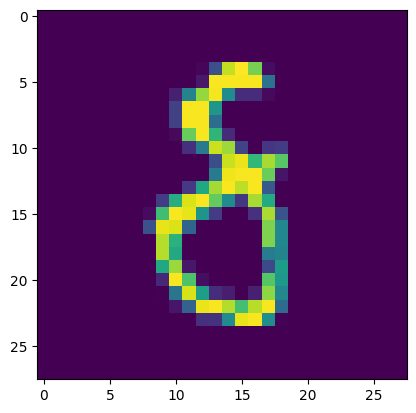

In [ ]:
# Install OpenCV library to process images.
# !pip3 install opencv-python

### Resize an image
import cv2
resized_img = cv2.resize(X_train[0], dsize=(32,32)) # Resize the first sample in the training set to 32x32.
print("Image shape after being resized: ", resized_img.shape)

# Show an image
plt.imshow(X_train[2,:,:])
plt.show()

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Initialize AlexNet as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
AlexNet = Sequential(name='AlexNet')

# Block 1
AlexNet.add(Conv2D(filters=64, input_shape=(28,28,1), kernel_size=(3,3), strides=(1,1), padding='same', name='Block_1_Conv')) # padding="same" means input and output have the same spatial dimension.
AlexNet.add(Activation('relu')) # Add RELU activation function
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_1_MaxPool')) # Overlapping MaxPooling since the pooling kernel (3x3) is larger than the pooing stride (2x2).

# Block 2
AlexNet.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1,1), padding='same', name='Block_2_Conv'))
AlexNet.add(Activation('relu')) # Shorter way wot write: AlexNet.add(Conv2D(..., activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_2_maxPool'))

# Block 3
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_3_Conv'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_3_maxPool'))

# Block 4
AlexNet.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_4_Conv'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_4_maxPool'))

# Block 5
AlexNet.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_5_Conv'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_5_MaxPool'))

# Flatten
AlexNet.add(Flatten()) # Reshape the tensor to 1D tensor so that it can be used as input of a fully connected (fc) layer

# Fully connected (FC) layer 1
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(rate=0.4))

# Fully connected (FC) layer 2
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())    
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(rate=0.4)) 

# Fully connected (FC) layer 3
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())    
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(rate=0.4)) 

# Fully connected (FC) layer 3
AlexNet.add(Dense(10)) # Number of output classes
AlexNet.add(Activation('softmax')) # Classification network often ends with softmax activation function.

#Model Summary
AlexNet.summary()

# Example of non-trainable parameters: statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Block_1_Conv (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 Block_1_MaxPool (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 Block_2_Conv (Conv2D)       (None, 14, 14, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 128)       0         
                                                                 
 Block_2_maxPool (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                       

In [ ]:
# Compile the model
AlexNet.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy']) # Define initial learning rate and metrics.

In [ ]:
### Create a callback ModelCheckpoint: this callback will save a better version of model every time the optimizer finds one. 
#### filepath: path to save the better model.
#### monitor: metrics to identify how a model is considered to be better.
#### mode='auto'/'max'/'min': to tell if the larger/smaller the metric, the better the model.
#### verbose: output log.
#### save_best_only: only save the best model instead off all better models along the training.

# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
mc = keras.callbacks.ModelCheckpoint(filepath="epoch-{epoch:02d}.hdf5", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better. 
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history = AlexNet.fit(X_train, y_train, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=30, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training



Epoch 1/30
106/106 [==============================] - 29s 103ms/step - loss: 0.6776 - accuracy: 0.7798 - val_loss: 2.2331 - val_accuracy: 0.3000
Epoch 2/30
106/106 [==============================] - 9s 82ms/step - loss: 0.0854 - accuracy: 0.9736 - val_loss: 2.0592 - val_accuracy: 0.7048
Epoch 3/30
106/106 [==============================] - 9s 83ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 1.5632 - val_accuracy: 0.9563
Epoch 4/30
106/106 [==============================] - 9s 87ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.7175 - val_accuracy: 0.9758
Epoch 5/30
106/106 [==============================] - 9s 88ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.2205 - val_accuracy: 0.9660
Epoch 6/30
106/106 [==============================] - 9s 86ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0596 - val_accuracy: 0.9855
Epoch 7/30
106/106 [==============================] - 9s 86ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.0403 - val_accuracy: 0.98

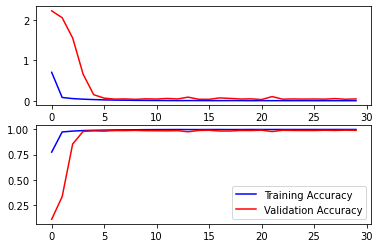

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
# Let us load a saved model and evaluate its performance on the test set
model = tf.keras.models.load_model("/content/epoch-21.hdf5")
result = AlexNet.evaluate(X_test, y_test) # If unspecified, batch_size will default to 32

313/313 [==============================] - 2s 5ms/step - loss: 0.0405 - accuracy: 0.9903


In [ ]:
# Show the model performance
print(AlexNet.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in AlexNet.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.040459029376506805, accuracy = 0.9902999997138977


In [ ]:
# Save the model as an h5 file
model.save('my_model.h5')

In [ ]:
# Load the trained model
model.load_weights('my_model.h5')

# Make predictions on new data
predictions = model.predict(X_test[999:1000])
print(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 192ms/step
[9]


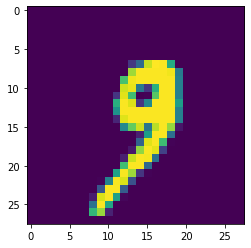

In [ ]:
# Show an image
plt.imshow(X_test[1000,:,:])
plt.show()